In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import os
import numpy as np

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
# Create dataset and data loader
# Sample file paths and labels (replace with actual paths and labels)
universities = os.listdir('processed_subjects')
subject_files = []
file_paths = []

for subfiles in universities[:1]:
    # Correctly join the directory path
    files = os.listdir(os.path.join('processed_subjects', subfiles))
    for file in files:
        if not file[:5].isdigit():
            continue # Iterate directly over the list of files
        file_paths.append(os.path.join('processed_subjects', subfiles, file))
    subject_files += files

In [4]:
print(len(file_paths))
print(file_paths)

52
['processed_subjects/final_processed/29880.csv', 'processed_subjects/final_processed/29903.csv', 'processed_subjects/final_processed/29895.csv', 'processed_subjects/final_processed/29881.csv', 'processed_subjects/final_processed/29899.csv', 'processed_subjects/final_processed/29917.csv', 'processed_subjects/final_processed/29896.csv', 'processed_subjects/final_processed/29912.csv', 'processed_subjects/final_processed/29904.csv', 'processed_subjects/final_processed/29874.csv', 'processed_subjects/final_processed/29890.csv', 'processed_subjects/final_processed/29866.csv', 'processed_subjects/final_processed/29865.csv', 'processed_subjects/final_processed/29877.csv', 'processed_subjects/final_processed/29875.csv', 'processed_subjects/final_processed/29916.csv', 'processed_subjects/final_processed/29910.csv', 'processed_subjects/final_processed/29897.csv', 'processed_subjects/final_processed/29900.csv', 'processed_subjects/final_processed/29893.csv', 'processed_subjects/final_processed/

In [5]:
meta_paths = os.listdir('/mnt/k/Abide Dataset/metadata/')
meta_paths

['ABIDEII-EMC_1_CSV.csv', 'ABIDEII-GU_1.csv']

In [6]:

patients_metadata1 = pd.read_csv('/mnt/k/Abide Dataset/metadata/ABIDEII-EMC_1_CSV.csv')
meta2 = pd.read_csv('/mnt/k/Abide Dataset/metadata/ABIDEII-GU_1.csv', encoding = 'ISO-8859-1')

patients_metadata = pd.concat([patients_metadata1 , meta2])
patients_metadata.fillna(0)

labels = []
subjects = []
for sub in subject_files:
    if not sub[:5].isdigit():
        continue
    key = int(sub[:5])
    subjects.append(str(key))
    labels.append(patients_metadata.loc[patients_metadata['SUB_ID'] == key, 'DX_GROUP'].values.sum()-1)
 
labels = torch.tensor(labels)

print(labels)
print(len(labels))
print(subjects)
patients_metadata.head()

tensor([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
        1, 1, 1, 0])
52
['29880', '29903', '29895', '29881', '29899', '29917', '29896', '29912', '29904', '29874', '29890', '29866', '29865', '29877', '29875', '29916', '29910', '29897', '29900', '29893', '29867', '29894', '29907', '29901', '29915', '29908', '29871', '29906', '29909', '29913', '29914', '29885', '29889', '29883', '29878', '29868', '29884', '29876', '29879', '29882', '29873', '29905', '29898', '29872', '29911', '29886', '29888', '29869', '29902', '29891', '29892', '29870']


,SITE_ID,SUB_ID,NDAR_GUID,DX_GROUP,PDD_DSM_IV_TR,ASD_DSM_5,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,...,ADI_R_C4_HIGHER,ADI_R_C4_UNUSUAL_SENSORY_INTERESTS,ADI_R_C4_TOTAL,ADI_R_D_AGE_PARENT_NOTICED,ADI_R_D_AGE_FIRST_SINGLE_WORDS,ADI_R_D_AGE_FIRST_PHRASES,ADI_R_D_AGE_WHEN_ABNORMALITY,ADI_R_D_INTERVIEWER_JUDGMENT,NON_ASD_PSY_DX_ICD9_CODE,NON_ASD_PSY_DX_LABEL
0,ABIDEII-EMC_1,29864,NaN,1,NaN,NaN,9.013005,1,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABIDEII-EMC_1,29865,NaN,1,NaN,NaN,10.663929,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABIDEII-EMC_1,29866,NaN,1,NaN,NaN,8.720055,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABIDEII-EMC_1,29867,NaN,1,NaN,NaN,8.517454,2,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABIDEII-EMC_1,29868,NaN,1,NaN,NaN,10.650240,1,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
class TimeSeriesDataset(Dataset):
    def __init__(self, file_paths, labels):
        self.file_paths = file_paths
        self.labels = labels

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        # Load the CSV data and ensure the shape is (150, 1000)
        data = pd.read_csv(self.file_paths[idx], header=None)[:152].values  # Shape: (150, 1000)
        data = torch.tensor(data, dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return data, label



In [8]:
#file_paths = [os.path.join('final_processed', sub) for sub in subjects_files]

In [9]:
#hyperparameters
input_size = 1000         # Number of features (assumes 1 feature per timestamp)
hidden_size = 8 # Number of hidden units in LSTM
num_layers = 2      # Number of LSTM layers
num_classes = 2        # Number of output classes (adjust as needed)
batch_size = 2

In [10]:
from sklearn.model_selection import train_test_split

# Split file paths and labels into training and testing sets (70% train, 30% test)
train_paths, test_paths, train_labels, test_labels = train_test_split(
    file_paths, labels, test_size=0.3, random_state=42
)

# Create datasets and data loaders
train_dataset = TimeSeriesDataset(train_paths, train_labels)
test_dataset = TimeSeriesDataset(test_paths, test_labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size)


In [11]:
class TimeSeriesClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout=0):
        super(TimeSeriesClassifier, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, hidden_size)  # Linear layer to hidden size
        self.relu = nn.ReLU()  # ReLU activation
        self.output_layer = nn.Linear(hidden_size, num_classes)  # Final output layer
        self.sigmoid = nn.Sigmoid()  # Sigmoid for binary classification

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # Use output of the last time step
        out = self.fc(out)
        out = self.relu(out)  # Apply ReLU activation
        out = self.output_layer(out)  # Final layer
        out = self.sigmoid(out)  # Apply sigmoid activation for binary classification
        return out


In [12]:
# Instantiate the model and move it to the GPU
model = TimeSeriesClassifier(input_size, hidden_size, num_layers, num_classes).to(device)



In [13]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'


In [15]:
test_labels

tensor([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1])

In [16]:
# Training parameters
import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm
num_epochs = 25
learning_rate = 0.0005

# Loss and optimizer
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    for sequences, labels in train_loader:
        # Move data to GPU
        sequences = sequences.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(sequences)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    



Epoch [1/25], Loss: 0.7022
Epoch [2/25], Loss: 0.7012
Epoch [3/25], Loss: 0.7000
Epoch [4/25], Loss: 0.6984
Epoch [5/25], Loss: 0.6974
Epoch [6/25], Loss: 0.6962
Epoch [7/25], Loss: 0.6941
Epoch [8/25], Loss: 0.6898
Epoch [9/25], Loss: 0.6831
Epoch [10/25], Loss: 0.6731
Epoch [11/25], Loss: 0.6591
Epoch [12/25], Loss: 0.6422
Epoch [13/25], Loss: 0.6253
Epoch [14/25], Loss: 0.6058
Epoch [15/25], Loss: 0.5755
Epoch [16/25], Loss: 0.5362
Epoch [17/25], Loss: 0.5002
Epoch [18/25], Loss: 0.4696
Epoch [19/25], Loss: 0.4448
Epoch [20/25], Loss: 0.4247
Epoch [21/25], Loss: 0.4084
Epoch [22/25], Loss: 0.3953
Epoch [23/25], Loss: 0.3846
Epoch [24/25], Loss: 0.3757
Epoch [25/25], Loss: 0.3683


In [17]:
# Evaluation loop
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    correct = 0
    total = 0
    for sequences, labels in train_loader:
        sequences = sequences.to(device)
        labels = labels.to(device)
        
        outputs = model(sequences)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the model on the training data: {100 * correct / total:.2f}%')

# Evaluate the model on the test data
predicted_values = []

model.eval()  # Set model to evaluation mode
with torch.no_grad():
    correct = 0
    total = 0
    for sequences, labels in test_loader:
        sequences = sequences.to(device)
        labels = labels.to(device)
        
        outputs = model(sequences)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        predicted_values.extend(predicted.cpu().numpy())

print(f'Accuracy of the model on the test data: {100 * correct / total:.2f}%')


Accuracy of the model on the training data: 100.00%
Accuracy of the model on the test data: 75.00%


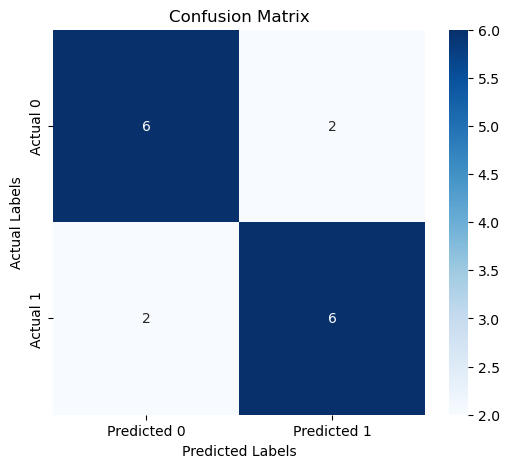

Precision: 0.75
Recall: 0.75
F1 Score: 0.75


In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# Example ground truth labels and predicted labels
y_true = test_labels
y_pred = predicted_values


# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

# Calculate metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
